Link to the colab: https://colab.research.google.com/drive/1iBKcI-4MyEZvpZApKtOKChfDTeRqS1Ia?usp=sharing

In [7]:
import pandas as pd

from google.colab import files
uploaded =files.upload ()


Saving Customer Churn in Telecom.csv to Customer Churn in Telecom (1).csv


In [33]:
df = pd.read_csv("Customer Churn in Telecom.csv")

In [34]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes




```
# This is formatted as code
```

##Exploratory Data Analysis

Data type identification


In [10]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


Data preparation (handling missing values)

In [36]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


Data preparation (Encoding categorical variables)

In [37]:
#Creating a new column for PhoneService in the name of PhoneService_encoded with 0,1 instead of 'No' and 'Yes'

ordinal_mapping = {'No': 0, 'Yes': 1}

ordinal_map = lambda x: x.map(ordinal_mapping)
df['PhoneService_encoded'] = ordinal_map(df['PhoneService'])


In [38]:
#Creating a new column for Churn in the name of Churn_encoded with 0,1 instead of 'No' and 'Yes'
df['Churn_encoded'] = ordinal_map(df['Churn'])

In [39]:
df.drop(columns=['PhoneService'], inplace=True) # Droping the old column
df.drop(columns=['Churn'], inplace=True) # Droping the old column

Changing Data Types


In [40]:
#changing column data type from object to float64

df['TotalCharges'] = df['TotalCharges'].replace(' ',)
df['TotalCharges'] = df['TotalCharges'].astype('float64')

<ipython-input-40-96e80e19bfb2>:3: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  df['TotalCharges'] = df['TotalCharges'].replace(' ',)


Statistical summary of the *data*

In [41]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,PhoneService_encoded,Churn_encoded
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2285.169963,0.903166,0.265370
std,0.368612,24.559481,30.090047,2267.544511,0.295752,0.441561
min,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,401.675000,1.000000,0.000000
50%,0.000000,29.000000,70.350000,1398.250000,1.000000,0.000000
75%,0.000000,55.000000,89.850000,3803.050000,1.000000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000


*Basic* function creation


In [50]:

#Below function makes it easier to view the records based on the customer id
def view_r(c_id):
  indx = df[df["customerID"]==c_id].index
  display(df.iloc[indx])
  return view_r

In [51]:
view_r('2234-XADUH')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,PhoneService_encoded,Churn_encoded
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.2,7362.9,1,0


<function __main__.view_r(c_id)>

Repetition statements (loops)


In [54]:
# With the help of this repetition statement we would like to see the customer records from index 0 to 9
# We have also used the function that we defined above which is view_r() for this repetition

i=0
for i in range(0,6):
  print(view_r(df.iloc[i,0]))

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,PhoneService_encoded,Churn_encoded
0,7590-VHVEG,Female,0,Yes,No,1,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0


<function view_r at 0x7fc5d0bc3490>


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,PhoneService_encoded,Churn_encoded
1,5575-GNVDE,Male,0,No,No,34,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.5,1,0


<function view_r at 0x7fc5d0bc3490>


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,PhoneService_encoded,Churn_encoded
2,3668-QPYBK,Male,0,No,No,2,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1


<function view_r at 0x7fc5d0bc3490>


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,PhoneService_encoded,Churn_encoded
3,7795-CFOCW,Male,0,No,No,45,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,0,0


<function view_r at 0x7fc5d0bc3490>


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,PhoneService_encoded,Churn_encoded
4,9237-HQITU,Female,0,No,No,2,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,1,1


<function view_r at 0x7fc5d0bc3490>


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,PhoneService_encoded,Churn_encoded
5,9305-CDSKC,Female,0,No,No,8,Yes,Fiber optic,No,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1,1


<function view_r at 0x7fc5d0bc3490>



Creating dictionary




In [55]:
## Create a dictionary to store the customer Contract type and their respective churn rates.

Contract_churn_rate = df.groupby(['Contract'])['Churn_encoded'].mean() * 100
Contract_churn_rate = Contract_churn_rate.to_dict()
print(Contract_churn_rate)

{'Month-to-month': 42.70967741935484, 'One year': 11.269517990495586, 'Two year': 2.831858407079646}


In [58]:
## Create a dictionary to store the customer Payment Method and their respective churn rates.
method_churn_rate = df.groupby(['PaymentMethod'])['Churn_encoded'].mean()*100
method_churn_rate = method_churn_rate.to_dict()
print(method_churn_rate)

{'Bank transfer (automatic)': 16.709844559585495, 'Credit card (automatic)': 15.243101182654403, 'Electronic check': 45.28541226215645, 'Mailed check': 19.106699751861044}


Sorting the df based on Customer ID


In [47]:
df.sort_values(by=['customerID'], ascending=True)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,PhoneService_encoded,Churn_encoded
2307,0002-ORFBO,Female,0,Yes,Yes,9,No,DSL,No,Yes,...,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,1,0
3488,0003-MKNFE,Male,0,No,No,9,Yes,DSL,No,No,...,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1,0
3845,0004-TLHLJ,Male,0,No,No,4,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,1,1
5931,0011-IGKFF,Male,1,Yes,No,13,No,Fiber optic,No,Yes,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,1,1
5569,0013-EXCHZ,Female,1,Yes,No,3,No,Fiber optic,No,No,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3607,9987-LUTYD,Female,0,No,No,13,No,DSL,Yes,No,...,Yes,No,No,One year,No,Mailed check,55.15,742.90,1,0
2875,9992-RRAMN,Male,0,Yes,No,22,Yes,Fiber optic,No,No,...,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,1,1
1260,9992-UJOEL,Male,0,No,No,2,No,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1,0
1996,9993-LHIEB,Male,0,Yes,Yes,67,No,DSL,Yes,No,...,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,1,0


filtering data to see the customers having tenure greater than 50




In [48]:
tenure_filter  = df[df['tenure'] > 50]
tenure_filter.sort_values(by=['tenure'], ascending=True)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,PhoneService_encoded,Churn_encoded
1364,1084-MNSMJ,Female,0,Yes,Yes,51,No,DSL,Yes,Yes,...,Yes,Yes,Yes,Two year,No,Credit card (automatic),85.50,4421.95,1,0
689,5076-YVXCM,Male,0,No,No,51,Yes,Fiber optic,No,No,...,No,No,Yes,Month-to-month,No,Bank transfer (automatic),83.40,4149.45,1,0
3214,0549-CYCQN,Male,1,No,No,51,Yes,Fiber optic,No,Yes,...,No,No,No,One year,Yes,Bank transfer (automatic),79.60,3974.70,1,0
6646,8249-THVEC,Male,0,Yes,Yes,51,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,One year,No,Mailed check,19.40,997.75,1,0
250,4075-JFPGR,Female,0,Yes,No,51,No,Fiber optic,Yes,Yes,...,No,Yes,No,One year,Yes,Electronic check,93.50,4619.55,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6092,4024-CSNBY,Female,0,Yes,No,72,Yes,Fiber optic,Yes,Yes,...,Yes,No,No,Two year,Yes,Bank transfer (automatic),94.25,6849.75,1,0
733,7564-GHCVB,Female,0,Yes,Yes,72,Yes,Fiber optic,Yes,No,...,No,No,No,Two year,No,Bank transfer (automatic),79.05,5730.70,1,0
4505,6917-FIJHC,Female,0,Yes,No,72,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,26.00,1776.00,1,0
6115,3831-YCPUO,Female,0,Yes,Yes,72,No,Fiber optic,Yes,Yes,...,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),109.50,7854.90,1,0


Slicing

Df2 shows the data of the 10 customers having the lowest tenure

In [49]:
df2 = df.sort_values(by=['tenure'], ascending=True).iloc[0:11,0:]

In [25]:
df2

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,PhoneService_encoded,Churn_encoded
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No phone service,DSL,Yes,Yes,...,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,7133.25,0,0
936,5709-LVOEQ,Female,0,Yes,Yes,0,No,DSL,Yes,Yes,...,No,Yes,Yes,Two year,No,Mailed check,80.85,308.05,1,0
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,DSL,No,Yes,...,Yes,Yes,No,Two year,No,Mailed check,73.35,3554.60,1,0
4380,2520-SGTTA,Female,0,Yes,Yes,0,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,5974.30,1,0
5218,2923-ARZLG,Male,0,Yes,Yes,0,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,270.15,1,0
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,1031.70,1,0
753,3115-CZMZD,Male,0,No,Yes,0,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,515.75,1,0
6754,2775-SEFEE,Male,0,No,Yes,0,Yes,DSL,Yes,Yes,...,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,3815.40,1,0
3331,7644-OMVMY,Male,0,Yes,Yes,0,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,4913.30,1,0
488,4472-LVYGI,Female,0,Yes,Yes,0,No phone service,DSL,Yes,No,...,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,6201.95,0,0


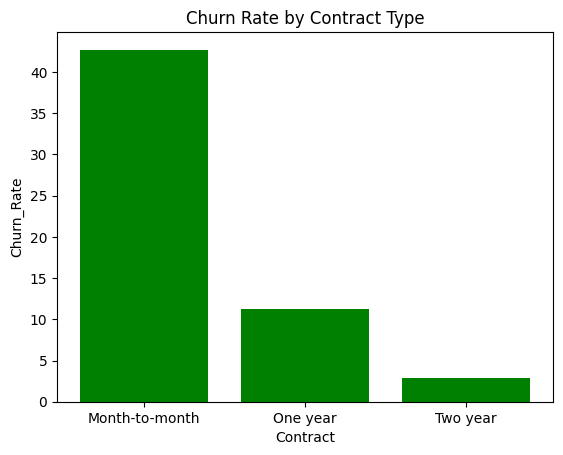

In [26]:
# Created a bar chart with the help of Contract_churn_rate dictionary

import matplotlib.pyplot as mpl

Contract=Contract_churn_rate.keys()
Churn_Rate=Contract_churn_rate.values()
mpl.bar(Contract, Churn_Rate, color='green')

mpl.xlabel("Contract")
mpl.ylabel("Churn_Rate")
mpl.title("Churn Rate by Contract Type")
mpl.show()

Text(0.5, 1.0, 'Customer Contract Type')

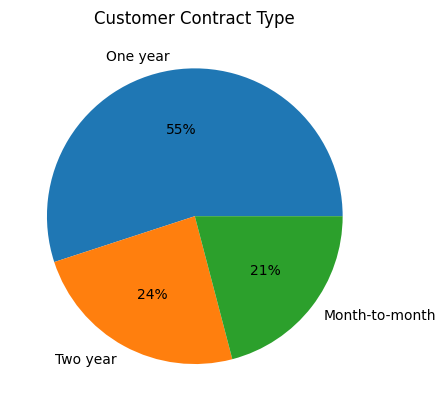

In [27]:
# Created pie chart with customers contract type to see under which contract we have the most number of customers

Contract_count=df['Contract'].value_counts()

mpl.pie(Contract_count, labels=['One year', 'Two year','Month-to-month'],autopct='%1.0f%%')
mpl.title("Customer Contract Type")

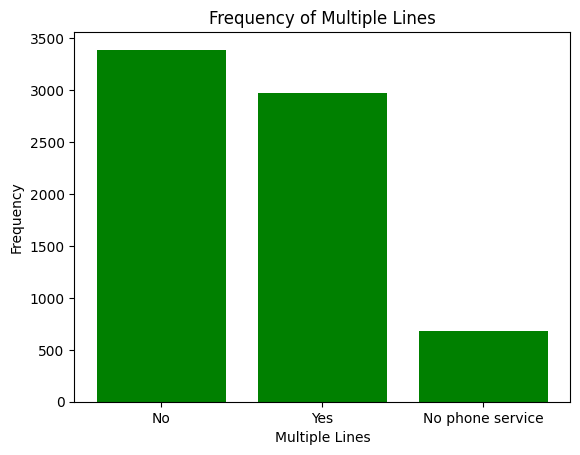

In [28]:
# Created bar chart to see the frequency of Multiple Lines

value_counts = df['MultipleLines'].value_counts()


mpl.bar(value_counts.index, value_counts, color='green')

mpl.xlabel('Multiple Lines')
mpl.ylabel('Frequency')
mpl.title('Frequency of Multiple Lines')
mpl.show()


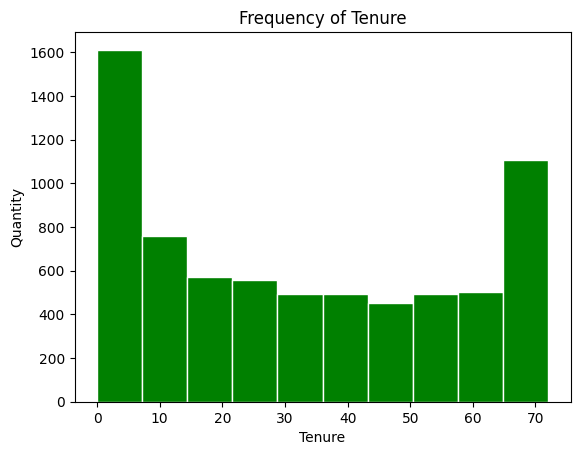

In [29]:
# Created histogram to show the frequency of tenure
mpl.hist(df['tenure'],bins=10, color='green', edgecolor="white")
mpl.xlabel('Tenure')
mpl.ylabel('Quantity')
mpl.title('Frequency of Tenure')
mpl.show()

Text(0.5, 1.0, 'Gender Distribution')

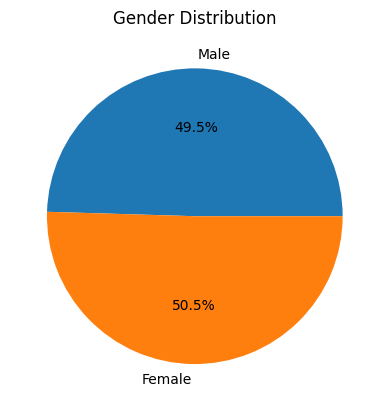

In [30]:
# Created pie chart to show gender distribution by pie chart
gender_count = df.groupby('gender')['gender'].count()
mpl.pie(gender_count, labels=['Male', 'Female'],autopct='%1.1f%%')
mpl.title("Gender Distribution")

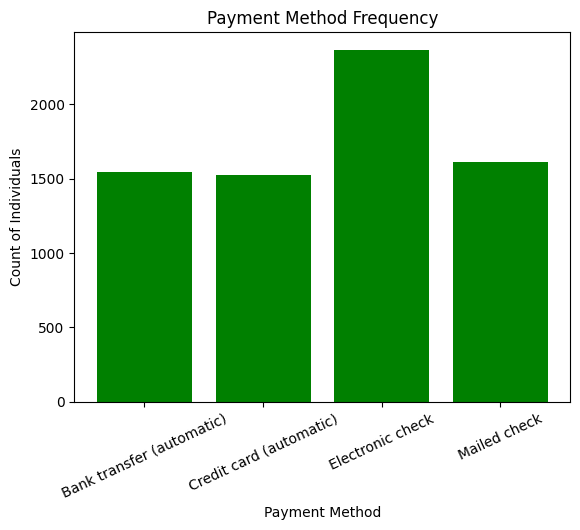

In [31]:
# Created a bar chart to see the frequency of each payment method

PaymentMethod_dict = df.groupby(['PaymentMethod'])['PaymentMethod'].value_counts().to_dict()

mpl.bar(PaymentMethod_dict.keys(), PaymentMethod_dict.values(), color='green')

mpl.xlabel("Payment Method")
mpl.ylabel("Count of Individuals")
mpl.title("Payment Method Frequency")
mpl.xticks(rotation=25)
mpl.show()

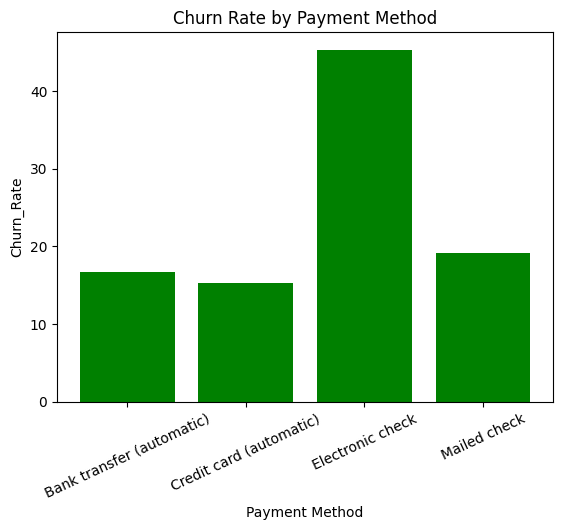

In [32]:
# Created a bar chart to see the churn rate by Payment method with the help of a dictionary


mpl.bar(method_churn_rate.keys(), method_churn_rate.values(), color='green')

mpl.xlabel("Payment Method")
mpl.ylabel("Churn_Rate")
mpl.title("Churn Rate by Payment Method")
mpl.xticks(rotation=25)
mpl.show()